# 감성 분석(Sentiment Analysis)
## 텍스트의 어조가 긍정, 중립, 부정인지 분석
- 긍정(positive), 중립(neutral), 부정(negative)와 같은 감성의 정도를 **극성(polarity)**이라고 함 <br/>
극성은 주로 숫자로 표현됨 &nbsp; &nbsp; ex)긍정:+, 중립:0, 부정:- <br/><br/>

## [감성분석의 어려운점](https://aws.amazon.com/ko/what-is/sentiment-analysis/)
- 비꼬기 &nbsp; &nbsp; ex) "아주 훌륭해요! 물건을 받는 데 3주나 걸렸어요."
- 부정 &nbsp; &nbsp; &nbsp; ex) "구독료가 비싸다고 말하지는 않을 것입니다."&nbsp; &nbsp;  "영화가 안 좋다고 아니 할 수 없다고 하기 어렵다."
- 다극성: 문장에 둘 이상의 감정이 포함되어 있을 때 &nbsp; &nbsp; &nbsp; ex) "견고한 구조는 만족스럽지만 색상은 그다지 인상적이지 않습니다."
<br/> <br/><br/>

## 감성분석 방법론
### 1. 어휘 기반(lexicon-based)
- 명사, 형용사, 동사 등 모든 단어에 대해 긍정 혹은 부정의 감성을 붙여 감성 사전을 구축하여 감성 분석을 수행하는 방식 <br/>
ex) '마블 영화는 액션이 화려하다'를 형태소 분석 -> ['마블', '영화', '액션', '화려하다'] <br/>
&nbsp; &nbsp; &nbsp; 가장 간단한 방법은 각 극성의 합을 구하는 것, 여기서는 '화려하다'가 긍정이므로 1을 가짐 => 따라서 긍정이라고 판단 <br/>
- 극성의 합을 이용한 감성 계산의 문제점
한 번의 부정으로 전체 문장이 부정이 되는 경우 ex) '영상이 유려하거나 배우가 연기를 잘하거나 시나리오가 좋은 것은 **아니다**' <br/>

- 이 문제점을 극복하기 위한 방법
**청킹(Chunking)**: 문장의 형태소를 분석하고 다시 명사구, 형용사구와 같은 구로 묶음 <br/>
청킹을 한 뒤, 밑의 단어에서 상위 구로 이동하면서 긍정/부정을 결정한다
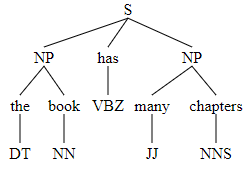
<br/>

### 2. 머신러닝 기반
- 학습용 리뷰 데이터셋과 리뷰에 대한 감성 Label 데이터셋이 필요
- Label이 긍정/중립/부정으로 나뉜 일종의 문서 분류 문제로 볼 수 있음

In [1]:
# 감성 사전을 이용한 영화 리뷰 감성 분석
# nltk의 movie_reviews 데이터셋 이용

import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print("# review length: ", len(movie_reviews.fileids()))

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...


# review length:  2000


[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
# 파일 10개
print("# samples of file ids: ", movie_reviews.fileids()[:10])

# label - movie_reviews.categories()
print("# label of reviews: ", movie_reviews.categories())

# 긍정 리뷰의 개수 반환
print("# num of 'pos' reviews: ", len(movie_reviews.fileids(categories='pos')))

# 부정 리뷰의 개수
print("# num of 'neg' reviews: ", len(movie_reviews.fileids(categories='neg')))

# samples of file ids:  ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
# label of reviews:  ['neg', 'pos']
# num of 'pos' reviews:  1000
# num of 'neg' reviews:  1000


In [3]:
# 리뷰와 레이블 가져오기
fileids = movie_reviews.fileids()

reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [5]:
!pip install -U textblob
!python -m textblob.download_corpora

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [8]:
# TextBlob을 이용한 감성 분석
from textblob import TextBlob

result = TextBlob(reviews[0])
print(result.sentiment)   # 감성분석 결과 출력 (sentiment 속성)
# polarity: 극성을 나타냄, -1.0 ~ 1.0
# subjectivity: 주관성을 의미, 0.0(객관적) ~ 1.0(주관적)
print(reviews[0][:300])

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the


In [9]:
# TextBlob 결과를 pos, neg로 변환
def sentiment_TextBlob(docs):
    results = []
    
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:   # 긍정
            results.append('pos')
        else:
            results.append('neg')                # 부정
            
        
    return results

In [10]:
from sklearn.metrics import accuracy_score

print("# TextBlob을 이용한 리뷰 감성분석의 정확도: ", accuracy_score(categories, sentiment_TextBlob(reviews)))
# 생각보다 정확도가 낮다..

# TextBlob을 이용한 리뷰 감성분석의 정확도:  0.6


In [12]:
!pip install afinn

     ---------------------------------------- 52.6/52.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=45a2d2caae0e8ad95c5afa30ae909ca44fb12d3243ade2eb072a5fbc80b139a4
  Stored in directory: c:\users\ing06\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [15]:
# AFINN을 이용한 감성분석
# -5 ~ 5사이의 극성을 가짐

from afinn import Afinn

def sentiment_Afinn(docs):
    afinn = Afinn(emoticons=True)   # 텍스트에 이모티콘이 포함되어 있는 경우
    results = []
    
    for doc in docs:
        if afinn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
            
    return results

print("# Afinn 이용한 리뷰 감성분석의 정확도: ", accuracy_score(categories, sentiment_Afinn(reviews)))

# Afinn 이용한 리뷰 감성분석의 정확도:  0.664


In [16]:
# VADER를 이용한 감성 분석
# 규칙기반 감성 분석 알고리즘 사용
# SNS 텍스트에서 좋은 성능이 나올 수 있도록 개발됨

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ing06\AppData\Roaming\nltk_data...


True

In [17]:
# VADER의 SentimentIntensityAnalyzer
# 4개의 극성값을 제공 'pos', 'neg', 'neu', 'compound'
# compound: 세 값을 적절히 조합해 -1 ~ 1 사이의 극성값을 제공

# compound 값이 0.05 이상 -> 긍정, -0.05이하 -> 부정, 그 외는 중립

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results = []

    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')

    return results

print('# Vader을 이용한 리뷰 감성분석의 정확도:', accuracy_score(categories, sentiment_vader(reviews)))

# Vader을 이용한 리뷰 감성분석의 정확도: 0.635
